## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 

If students address the detailed feedback in a future checkpoint they will earn these points back


|                  | Unsatisfactory                                                                                                                                                                                                    | Developing                                                                                                                                                                                              | Proficient                                     | Excellent                                                                                                                              |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| Data relevance   | Did not have data relevant to their question. Or the datasets don't work together because there is no way to line them up against each other. If there are multiple datasets, most of them have this trouble | Data was only tangentially relevant to the question or a bad proxy for the question. If there are multiple datasets, some of them may be irrelevant or can't be easily combined.                       | All data sources are relevant to the question. | Multiple data sources for each aspect of the project. It's clear how the data supports the needs of the project.                         |
| Data description | Dataset or its cleaning procedures are not described. If there are multiple datasets, most have this trouble                                                                                              | Data was not fully described. If there are multiple datasets, some of them are not fully described                                                                                                      | Data was fully described                       | The details of the data descriptions and perhaps some very basic EDA also make it clear how the data supports the needs of the project. |
| Data wrangling   | Did not obtain data. They did not clean/tidy the data they obtained.  If there are multiple datasets, most have this trouble                                                                                 | Data was partially cleaned or tidied. Perhaps you struggled to verify that the data was clean because they did not present it well. If there are multiple datasets, some have this trouble | The data is cleaned and tidied.                | The data is spotless and they used tools to visualize the data cleanliness and you were convinced at first glance                      |


# COGS 108 - Data Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

## Research Question

Which genes, measured by gene expression on a 0-12 scale, contribute most to an accurate multiclass prediction of Luminal A, Luminal B, HER2-enriched, and Basal-like breast cancer subtypes, and are these gene contributions consistent across different classifiers?
- Which model performs best, and which genes are repeatedly presented as top predictors across gene feature choices?  

## Background and Prior Work

Breast cancer is a disease involving uncontrolled proliferation of cells resulting from DNA mutations acquired throughout a person’s lifetime. It is the most frequently diagnosed cancer, as well as one of the leading causes of death that is cancer-related. In 2026, an estimated 300,000+ cases of invasive breast cancer will be diagnosed, roughly translating to 1 in 8 women in the United States <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). One important thing to be aware of is that breast cancer isn’t one single disease. Tumors biologically are very different, which makes labeling them in subtypes a very useful labeling method. Gene expression profiling is a method that aims to distinguish cancerous from normal samples by analyzing individual, unique “molecular signatures” — specific patterns of genes that are switched on or off in cancer cells, but not in healthy tissue. In our question, we want to narrow down which genes contribute the most to specific types of breast cancer.

Each subtype of breast cancer primarily differs by the presence or absence of hormone receptors. These markers allow us to categorize tumors into four main molecular subtypes: Basal-like, HER2-enriched, Luminal A, and Luminal B. These four comprise our Kaggle dataset, and will be the types that we focus on within our analysis. In the clinic, each subtype is usually approximated using pathology tests – mainly: PR (progesterone receptor), ER (estrogen receptor), HER2 (human epidermal growth factor receptor 2), and other markers such as the nuclear protein Ki-67 (a familiar biomarker for cellular proliferation). As for the subtypes previously mentioned, they differ by a few main factors:

- Luminal A: Very hormone-driven with a lower proliferation rate. The typical receptors found are ER/PR+, HER2-, and low Ki-67. These factors indicate it is slower-growing and responds well to the hormone endocrine.
- Luminal B: Very hormone-driven; however, a higher proliferation rate than Luminal A. The typical receptors found are ER/PR+ (lower PR in comparison), and HER2 either +/-. These factors indicate more severity than Luminal A, and might need chemotherapy in addition to hormone therapy because it is less response to solely endocrine-based treatment 
- HER2-enriched: Driven primarily by the HER2 pathway, often HER2+, and is faster-growing and has a higher rate than Luminal A/B. Outcomes would improve with HER2-targeted treatments
- Basal-like: Triple negative with the common receptors ER/PR/HER2. Relies heavily on chemotherapy. 

The +/- sign following a receptor indicates the state of expression of that receptor for a certain tumor. For example, + means meaningful expression and that the receptor is turned on. 

Distinguishing the subtypes of cancer is critical in developing a treatment plan because it alters which hormone therapy should be applied to a patient. In HR+ circumstances, endocrine therapies are critical, whereas in HER2-driven cases, HER2-targeted drugs are of more importance. Furthermore, it changes the prognosis and recurrence pattern of a patient, since certain tumors have more favorable outlooks. 

After researching known information about what gene mutations cause/significantly increase the risk of developing breast cancer, we were able to narrow down hypotheses for each subtype of breast cancer. 

Previous research has explored a similar aspect in a published NlH article titled “Identification of breast cancer subtypes and drug response prediction through forward and reverse translation” <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). In this study, they predicted subtype-specific therapeutic drug response by connecting patient tumor data with cancer screening data. This group trained NMF-based models on DepMap cell-line data in order to predict CDK4 vs CDK6 (classes of medicine used in combination with hormone therapy) dependency from gene expression and applied those models to TCGA tumors. Results from this test suggested that Luminal A was mostly skewed towards a CDK4 dependency, while Luminal B had a skewed CDK6 dependency. Additionally, some subtypes showed more hormone expression than others, such as those with higher estrogen-driven expression, and others with high cell-cycle programs. The core differences between this experimental model and our project are that they were more focused on using patterns across thousands of genes to discover and describe subgroups, whereas we want to determine which specific genes are the root cause of breast cancer subgroups to be expressed. 

Another study published in Science Direct takes a more similar approach to our project than the last, but focusing on using feature selection strategies to “identify statistically significant genes and accurately classify cancer types from RNA-seq data” <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). Essentially, this project aims to create a masterlist of what specific genes are found in cancer tumor tissue. This study is more similar to our project, but instead interested in a general view of cancer types, rather than solely focusing on breast cancer. Our project wants to create a link between named genes and a specific subgroup of breast cancer, rather than cancer as a whole. In the analysis, they utilized Ridge Regression and Lasso algorithms to find the best features from the data. With Ridge Regression, this method helped to identify dominant genes among their 800+ cancer tissue sample set (bound to have a lot of noise). It is a well-suited statistical method for high-dimensional genomic datasets. In contrast, Lasso serves as a regularization technique and is particularly useful when only a subset of features are informative. The results of this study created a refined list of the top ~100 genes that were associated with various tumor types. Furthermore, they were able to find the highest vs lowest expression of the top 50 genes with a distinction by color, expanding their conclusion to also consider co-expressed genes and condition-specific patterns <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). 

1. <a name="cite_note-1"></a> [^](#cite_ref-1) American Cancer Society. (2026, January 13). *Key statistics for breast cancer: How common is breast cancer?* Retrieved February 4, 2026, from https://www.cancer.org/cancer/types/breast-cancer/about/how-common-is-breast-cancer.html

3. <a name="cite_note-2"></a> [^](#cite_ref-2) Akter, S., Adesola, R. O., & Basnet, S. (2025). Machine learning approach to identify significant genes and classify cancer types from RNA-seq data. *Global Medical Genetics, 12*(4), 100079. https://doi.org/10.1016/j.gmg.2025.100079

4. <a name="cite_note-3"></a> [^](#cite_ref-3) Karam, J., Rejto, P. A., Bienkowska, J. R., Mu, X. J., & Roh, W. (2025). Identification of breast cancer subtypes and drug response prediction through forward and reverse translation. *NPJ Precision Oncology, 9*, Article 267. https://doi.org/10.1038/s41698-025-01062-w

## Hypothesis


We predict that Basal-like tumors will show higher KRT5 and KRT14 expression, quantified by a larger mean standardized expression (z-score) for KRT5/KRT14 in Basal-like samples compared to the other three subtypes, and that these genes will rank highly by model feature importance (e.g., large one-vs-rest coefficients on Logistic Regression Classification task, higher accuracy/F1 compared to other choices of genes). Likewise, we expect HER2-enriched to be driven by higher ERBB2/GRB7, Luminal A by higher ESR1/PGR with relatively low ERBB2, and Luminal B by higher ESR1 plus higher MKI67 than Luminal A. This is because the subtypes reflect differences in basal markers, HER2 signaling, hormone signaling, and proliferation.

## Data

### Data overview

#### Dataset #1
Dataset Name: Breast cancer gene expression - CuMiDa
- Link to the dataset: https://www.kaggle.com/datasets/brunogrisci/breast-cancer-gene-expression-cumida
- Number of observations: 151 observations
- Number of variables: 54, 677 variables
- Description of the variables most relevant to this project: The most relevant variables include the normalized gene expression measurement and the breast cancer subtype label. The gene expression variables (Affymetrix ID) are continuous numerical features that represent the expression level of thousands of genes for each tumor sample. These will serve as the predictor variables in our classification model. The breast cancer subtype label is categorical and used to identify whether each sample is Basal-like, HER, Luminal A, or Luminal B, and acts as the response variable in our model. By combining these variables, they will allow us to train models and evaluate which specific genes contribute most to distinguishing between breast cancer subtypes.
- Descriptions of any shortcomings this dataset has with respect to the project: While the dataset is well-suited to our research question, it does present a few manageable limitations. To begin, the dataset contains a very large number of gene expression variables relative to the 151 samples, which means careful feature selection and model validation will be important to us to avoid overfitting. Additionally, the sample size is moderate, so we should keep in mind that the resulting findings should be interpreted as exploratory rather than definitive. There may also be some imbalance across subtype categories, which we can address by evaluating metrics such as precision, recall, and F1 score rather than relying solely on accuracy. The dataset also does not include demographic or clinical variables, so our analysis will focus strictly on molecular gene expression patterns rather than broader patient-level factors.


#### Dataset #2 
Dataset Name: GPL570 Annotation Table
- Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL570 
- Number of observations: 54, 675 observations
- Number of variables: 16
- Description of the variables most relevant to this project: The two variables most relevant to this project are ID and Gene Symbol. The ID variable serves as the unique identifier for each row in the annotation table. Each ID is formatted as a string, representing an internal code made by the company Affymetrix. The second variable, Gene Symbol, is a human-readable name for the gene that each row refers to, such as “DDR1”, “RFC2”, and “HSPA6”. These Gene Symbols are formatted as strings and are the generic shorthands of the genes developed by scientists over time. The ID is going to be used as a key to retrieve the Gene Symbol, which will give our conclusion meaning, tying certain genes to certain subtypes of breast cancer.
- Descriptions of any shortcomings this dataset has with respect to the project: A majority of the variables in this dataset are unnecessary for our project. We’re only using this dataset to convert the IDs in the Kaggle dataset to their respective gene symbol counterpart in order to give an accurate conclusion as to what genes have the most impact on a model classifying breast cancer. It is also worth noting that some rows contain multiple genes separated by “///”, meaning a single probe ID corresponds to more than one gene. This introduces some ambiguity, as it might be difficult to determine which of these genes is the most relevant.


In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [2]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
%pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    # { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    # { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Note: you may need to restart the kernel to use updated packages.


Overall Download Progress: 0it [00:00, ?it/s]


### Breast cancer gene expression - CuMiDa Dataset

CuMiDa Dataset is a curated breast cancer expression dataset from CuMiDa that contains normalized gene expression measurements across tumor samples, along with a categorical subtype label for each sample. Each row represents a single tumor sample, and the gene expression columns represent measured expression for thousands of genes/probes. These gene expression features are the input to a classification model, while the subtype label is the target output. The key metric in this dataset is the gene expression level that was reported as normalized microarray expression values. A larger value for a gene means that the gene’s mRNA signal is more strongly expressed in that tumor sample relative to genes with lower values, indicating greater transcriptional activity after normalization to make samples comparable and suggesting that the gene may be more biologically active and potentially playing a more significant role in that tumor’s molecular profile. However, a gene can be important for classification, whether it is consistently higher or lower across specific subtypes, as long as it shows systematic differences between groups. The other key metric is the subtype label, which is a categorical variable (ie, Basal-like, HER, Luminal A, Luminal B) used to evaluate how well a model can distinguish breast cancer subtypes based on expression patterns.

There are a few concerns to pay attention to. First, the dataset has 151 samples from a single GEO series (GSE45827) curated by CuMiDa, which may limit how broadly the result can be generalized to the overall breast cancer population. In addition, the dataset may have unequal sample sizes across subtypes, which can bias a model toward better performance on the larger classes. Finally, because the dataset is anonymized and doesn't include demographic or clinical background information, we can't check whether findings generalize equally across different patient groups, so the conclusion should be framed as exploratory and focused on molecular patterns.

The .zip file for this dataset was downloaded at https://www.kaggle.com/datasets/brunogrisci/breast-cancer-gene-expression-cumida/data


In [3]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('data/00-raw/Breast_GSE45827.csv')
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


#### Missingness Analysis
Since there are no missing values in the entire dataframe, we do not need to conduct systematic mechanistic missingness tests.

In [5]:
print('Any missing values in dataframe?: ', df.isnull().values.any())
print('Number of null values in dataframe', df.isnull().sum().sum())
print('Missing values per column: ', df.isnull().sum())

Any missing values in dataframe?:  False
Number of null values in dataframe 0
Missing values per column:  samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64


In [6]:
df.columns

Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54677)

#### Target Variable

In [7]:
df['type'].unique()

array(['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B'],
      dtype=object)

#### Descriptive Statistics

In [8]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095,7.787712,...,12.359605,11.823386,14.018193,13.773030,7.621929,5.699042,6.185605,2.918774,3.624008,3.173868
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550,1.648260,...,0.318436,0.369859,0.253870,0.290556,0.857777,0.860841,0.953867,0.093126,0.145394,0.101907
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065,3.866030,...,11.650564,10.939760,13.419083,13.191191,5.729767,4.326227,4.301471,2.733497,3.299401,2.937393
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260,6.804510,...,12.149550,11.592631,13.807282,13.523011,6.884862,4.967515,5.336542,2.861549,3.532740,3.109767
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957,7.912255,...,12.321900,11.830756,14.002497,13.740376,7.795425,5.489450,6.209136,2.911734,3.615106,3.163205
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337,8.887997,...,12.527235,12.021728,14.232589,14.028020,8.195458,6.449022,7.046721,2.961270,3.698539,3.229561
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006,11.710498,...,13.509037,13.119966,14.622678,14.482744,10.291243,8.112206,9.121638,3.322275,4.160823,3.451855


#### Shape
We mentioned our dataset having only 151 examples, however, we have 54675 genes to choose from as features. 

In [9]:
print('Size: ', df.shape)

Size:  (151, 54677)


#### Feature Scaling
Our features are currently normalized on the scale of 0-12.  
Our intended models may be sensitive to higher gene expression numbers; thus, we standardize all gene expression columns.

> We plan to fully standardize these columns later during predictive modeling to prevent data leakage. It will occur **after splitting the data into training and testing sets, but before training our models**

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['samples', 'type'], axis=1))

#### Wrangling and Data Preparation
Since we plan to perform multi-class classification, we label encode the target variable for training compatibility.

In [11]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['type_encoded'] = le.fit_transform(df['type'])
# df['type_encoded']

#### Preliminary EDA (PCA)

In [12]:
cancer_type = df['type']

# one-hot encoding 'type' column
df_one_hot = pd.get_dummies(df['type'])
df_one_hot = pd.concat([df.drop('type', axis = 1), df_one_hot], axis = 1)
df_one_hot

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,HER,basal,cell_line,luminal_A,luminal_B,normal
0,84,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,4.901594,2.966657,3.508495,3.301999,False,True,False,False,False,False
1,85,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,5.405839,2.934763,3.687666,3.064299,False,True,False,False,False,False
2,87,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,5.184286,2.847684,3.550597,3.158535,False,True,False,False,False,False
3,90,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,5.086569,3.031602,3.524981,3.272665,False,True,False,False,False,False
4,91,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,5.235318,2.956232,3.445501,3.193947,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,...,6.209136,2.852852,3.697448,3.333289,False,False,False,False,True,False
147,233,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,...,7.108210,2.929800,3.833289,3.213893,False,False,False,False,True,False
148,236,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,...,7.329545,3.085127,3.628848,3.215807,False,False,False,False,True,False
149,237,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,...,7.089259,3.018525,3.770597,3.102298,False,False,False,False,True,False


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_one_hot)
df_pca = pd.DataFrame(df_pca, columns = ['PC1', 'PC2'])
df_pca['label'] = cancer_type
df_pca.head()

,PC1,PC2,label
0,-121.050371,-21.744221,basal
1,-108.849847,-36.810627,basal
2,-131.031962,18.314177,basal
3,-99.920003,-46.516147,basal
4,-99.760043,-42.121018,basal


<Axes: xlabel='PC1', ylabel='PC2'>

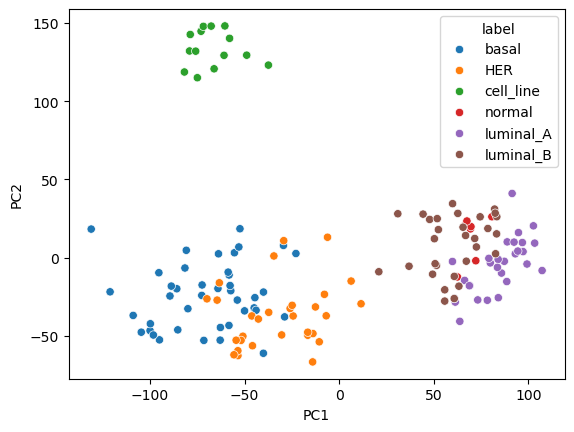

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(df_pca,x = 'PC1', y = 'PC2',hue = 'label')

### GPL570 Annotation Table

The GPL570 annotation dataset does not contain numerical measurements or clinical values in the traditional medical sense, and therefore does not have units or thresholds in the way that a dataset of medical measurements would. Instead, the two variables most relevant to this project (ID and Gene Symbol) are categorical in nature. The probe ID is formatted as a string and serves as a reference code with no inherent meaning. The Gene Symbol is also text-based, containing shorthand names for human genes such as “DDR1”. These 2 variables serve as a lookup table, allowing probe IDs from the Kaggle breast cancer dataset to be translated into recognizable gene names, giving our conclusions more value by tying actual genes to their impact on breast cancer.

The primary concern with this dataset is that it is being used solely as a lookup table to translate probe set IDs from the Kaggle breast cancer dataset into their corresponding gene symbols, meaning much of the dataset will go unused. Additionally, some probe sets map to multiple gene symbols separated by “///”, which may introduce ambiguity when trying to identify which specific genes are most influential in classifying breast cancer.

We also plan to merge this dataset with our CuMiDa dataset via joining the column names in CuMiDa with the ID column of this dataset, to obtain more informative feature labels and map each of what the genes themselves *actually* are, to the gene expression.

We downloaded our data from this link: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL570 

In [15]:
import sys
sys.path.append('./modules')
# from convert_annot_to_csv import convert_annot_to_csv
from convert_txt_to_csv import convert_txt_to_csv

# Convert .annot.gz file
# df1 = convert_annot_to_csv('data/00-raw/GPL570.annot.gz', 'data/00-raw/GPL570_annot.csv')

# Convert .txt file
df2 = convert_txt_to_csv('data/00-raw/GPL570-55999.txt', 'data/00-raw/GPL570-55999.csv')

Found 16 columns
First few headers: ['ID', 'GB_ACC', 'SPOT_ID', 'Species Scientific Name', 'Annotation Date']

Successfully converted data/00-raw/GPL570-55999.txt to data/00-raw/GPL570-55999.csv
Shape: (54675, 16)
Columns: ['ID', 'GB_ACC', 'SPOT_ID', 'Species Scientific Name', 'Annotation Date']...


In [16]:
# df1.head()

In [17]:
# df1.columns

In [18]:
df2.head()

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,U48705,,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,M87338,,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,X51757,,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,X69699,,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,L36861,,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


In [19]:
df2.columns

Index(['ID', 'GB_ACC', 'SPOT_ID', 'Species Scientific Name', 'Annotation Date',
       'Sequence Type', 'Sequence Source', 'Target Description',
       'Representative Public ID', 'Gene Title', 'Gene Symbol',
       'ENTREZ_GENE_ID', 'RefSeq Transcript ID',
       'Gene Ontology Biological Process', 'Gene Ontology Cellular Component',
       'Gene Ontology Molecular Function'],
      dtype='object')

#### Shape
This matches the number of gene feature columns in the previous dataset.

In [20]:
len(df2)

54675

#### Missingness Analysis

In [21]:
print('Any missing values in dataframe?: ', df2.isnull().values.any())
print('Number of null values in dataframe', df2.isnull().sum().sum())
# print('Missing values per column: ', df2.isnull().sum())

nan_count = df.isnull().sum()
empty_string_count = (df == '').sum()
total_missing_count = nan_count + empty_string_count
print('Total missing including empty strings: ', total_missing_count.sum())

Any missing values in dataframe?:  False
Number of null values in dataframe 0
Total missing including empty strings:  0


In [22]:
# filter out most columns to retain only the informative column and the merging column
df2_filtered = df2[['ID', 'Gene Title']]
df2_filtered

,ID,Gene Title
0,1007_s_at,discoidin domain receptor tyrosine kinase 1 //...
1,1053_at,"replication factor C (activator 1) 2, 40kDa"
2,117_at,heat shock 70kDa protein 6 (HSP70B')
3,121_at,paired box 8
4,1255_g_at,guanylate cyclase activator 1A (retina)
...,...,...
54670,AFFX-ThrX-5_at,
54671,AFFX-ThrX-M_at,
54672,AFFX-TrpnX-3_at,
54673,AFFX-TrpnX-5_at,


In [23]:
df2['Gene Title'].iloc[-1]

''

In [24]:
df2['Gene Symbol'].iloc[-1]

''

### Saving Wrangled Datasets

In [25]:
import os

# Ensure the directory exists
os.makedirs('data/02-processed', exist_ok=True)

# Save the fully wrangled dataframes to data/02-processed
df.to_csv('data/02-processed/breast_cancer_gene_expression_processed.csv', index=False)
df2.to_csv('data/02-processed/gpl570_annotation_processed.csv', index=False)

print("Successfully saved wrangled data to data/02-processed/")
print(f"Breast cancer data shape: {df.shape}")
print(f"Annotation data shape: {df2.shape}")

Successfully saved wrangled data to data/02-processed/
Breast cancer data shape: (151, 54677)
Annotation data shape: (54675, 16)


## Ethics

### A. Data Collection
- [X] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?


> The tissue samples were collected with consent for research purposes and deposited in the Gene Expression Omnibus (GEO), a publicly accessible database. 


- [X] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?


> The dataset was collected from a single study and lacks demographic information such as race, ethnicity, and age. This limits our ability to assess whether certain populations are underrepresented and whether our findings generalize across different groups. We likely won’t be able to take steps to address this, as the data was initially anonymized.


- [X] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?


> The dataset we chose already contains no personally identifiable information. The dataset only contains numerical gene expression values and cancer subtype labels.


- [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?


### B. Data Storage
- [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
- [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
- [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?


### C. Analysis
- [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
- [X] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, 
confirmation bias, imbalanced classes, or omitted confounding variables)?


> The dataset has some class imbalance, with some subtypes of breast cancer appearing more than others. This may lead to models performing better on larger classes. We will report per-class metrics and exclude cell line/normal samples as they may not accurately represent patient tumors.


- [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?


> All of the visualizations, summary statistics, and reports that we will create will be solely generated from the values in this dataset. We will clearly label sample sizes, report statistical significance where appropriate, and avoid making any claims that don’t correspond with our data.


- [X] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?


> Our initial dataset contains no PII. All analysis uses only anonymized gene expression values and subtype labels.

- [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?


> All code will be documented in Jupyter notebooks. The dataset is also publicly available, so our results should be easily reproducible.


### D. Modeling
- [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
- [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
- [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
- [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
- [X] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?


> Our analysis is purely educational and explanatory. We will clearly state that findings should not be used for clinical decision making without validation on larger, more diverse datasets.


### E. Deployment
- [ ] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
- [ ] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
- [ ] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
- [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?


## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Project Timeline Proposal

## Outline

### Week 5 – Project Proposal
- **We are proposing to use a high-dimensional dataset that may include advanced visualization and machine learning techniques not covered in this class. However, we believe that we have the ability to overcome most challenges in this project, and will happily use the resources given to us from the teaching staff.**

### Week 6-7 – Data cleaning, wrangling and exploratory data analysis
- Inspect data, checking for missing values, potential confounding variables, normalize data
- Aggregate analysis (groupby operations)
- Perform left inner join on affymetrix gene dataset (ID column) to map uninterpretable feature names (affymetrix ID column names) from Kaggle/CuMiDa dataset to more interpretable feature values
    - Choose 1-2: Sequence Type, Target Description, Gene Title, Gene Symbol
    - Convert affymetrix gene dataset .txt file to .csv
    - Transpose one of the datasets (if necessary)
- OR look at affymetrix gene dataset and handpick/narrow down genes to use (filter)
- Perform visualization operations (dimensionality reduction via PCA/t-SNE/DBSCAN, line plots, scatter plots, box-plots, heatmaps)
    - Use seaborn (sns)
    - Explore different subproblems
    - Visualize different genes and clusters
    - Interpret variance of gene expressiveness and document early results

### Week 8 – Statistical Analysis
- Frame statistical question(s) and choose appropriate groups (distributions) of interest
- Perform statistical tests to compare sample vs. population or multiple groups
    - Tests include t-tests, ANOVA, etc.

### Week 9 – Feature Engineering, Predictive Modeling
- Engineer new features if needed 
    - Nonlinear combinations (less interpretable)
    - Normalize data
    - Treat columns (genes) as vectors
- Filter cancer types
- Choose features and train classification models (multi-class) on different combinations of features
- Interpret weights and biases, strength of metrics (accuracy, precision, recall)
- Optimize bias-variance (Random Forests, NNs)
    - Visualize train-test accuracy over model complexity
- Handle class imbalances

### Week 10 – Write Discussion, Additional Results, Finalize everything
- Build conclusions, interpret results
- Interpret column names (affymetrix IDs) to determine how our chosen genes may contribute most (or least) to breast cancer based on how much they are expressed in terms of their predictive power 
- Finalize ethics sections
- Finish discussion section
- Fix bugs and errors

### Finals Week – Video, Team Eval Survey


## Timeline Table

| Meeting Date | Meeting Time | Completed Before Meeting | Discuss at Meeting |
|---|---|---|---|
| 2/4 | 2 PM | NA | Edit, finalize, and submit proposal;<br>Search for datasets / confirm CuMiDa context;<br>Assign Week 6–7 tasks + set up workflow (repo, board, channels) |
| 2/9 | 2 PM | **Import & Wrangle Data (Justin, Steven, Richard; Reviewed by Alena, Jeff):** load data, check shape/labels, basic cleaning/formatting, inspect missingness/confounders;<br>**EDA (All):** class counts, initial PCA/t-SNE, basic distribution checks;<br>Locate Affymetrix annotation file + start `.txt → .csv` conversion | Review/edit wrangling + EDA outputs;<br>Finalize cleaning decisions (normalization, outliers, label handling);<br>Plan/confirm Affymetrix ID → gene mapping approach + which fields to keep;<br>Assign next visuals + early-writeup tasks |
| 2/16 | 2 PM | Finalize wrangling + EDA (cleaned dataset saved, mapped IDs or partial mapping);<br>Expanded visuals (PCA/t-SNE/heatmaps/boxplots) + brief interpretations;<br>**Begin Analysis (Alena, Jeff; Reviewed by TBD):** define statistical question(s), pick groups, draft test plan (t-test/ANOVA assumptions/alternatives) | Edit/approve final EDA + interpretations;<br>Confirm statistical tests + comparisons that answer the research question;<br>Decide Week 9 modeling plan (baseline models, CV, feature selection);<br>Progress check + rebalance tasks if needed |
| 2/23 | 2 PM | Run statistical analysis (tests + effect sizes + p-values, note multiple comparisons if needed);<br>Start modeling (baseline classifier(s), initial feature selection, first metrics);<br>**Draft Results/Discussion outline (Jeff, Alena; Reviewed by TBD):** section skeleton + figure placeholders | Review stats results for correctness + interpretation;<br>Debug modeling + discuss confusion points (e.g., luminal A vs B);<br>Choose final model(s) + tuning plan;<br>Assign writing owners (Methods/Results/Discussion/Ethics) + editing reviewers |
| 3/2 | 2 PM | Complete modeling + finalize figures (CV metrics, confusion matrix, macro-F1, performance vs complexity);<br>Finalize feature importance/top genes (if mapped);<br>**Draft Results/Conclusion/Discussion (All):** full draft + references + captions | Full-project edit session (clarity, structure, citations);<br>Connect findings to prior work + biology;<br>Finalize ethics section;<br>Identify remaining gaps/bugs + assign final polish + video plan |
| 3/9 | 2 PM | Full draft complete (all sections written, citations added, code cleaned/commented, figures finalized);<br>Video script/outline ready; peer-review pass completed | Final QA: run notebook top-to-bottom, fix bugs, rubric check;<br>Finalize video recording roles + timeline;<br>Confirm submission checklist + team eval expectations |
| 3/16 | Before EOD | NA | Turn in Final Project & Group Project Surveys |
